
<h1>Pandas Tutorial</h1>

(C) Bartosz and Maria Teleńczuk


Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)

In [1]:
%matplotlib inline
import pandas as pd

pd.options.display.max_rows = 8

# Pandas: data analysis in python

 Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.

## Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

## Further reading

- the documentation: http://pandas.pydata.org/pandas-docs/stable/
- Wes McKinney's book "Python for Data Analysis"
- lots of tutorials on the internet (search "pandas tutorial" On github or youtube)



## Dataframes

DataFrame: multi-dimensional table of structured, hetermogeneous data, similar to spreadsheet

We will first download the data, **please copy and paste**:

In [2]:
# download data from server and save in a local file
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/btel/2021-uj-python-materials/master/data/countries.csv"
f = urlretrieve(url, filename='countries.csv')

In [3]:
import pandas as pd
countries = pd.read_csv("countries.csv")
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


### Useful functions

In [4]:
countries.head(n=2)

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris


In [5]:
countries.describe()

,population,area
count,5.000000,5.000000
mean,47.740000,269042.800000
std,31.519645,264012.827994
min,11.300000,30510.000000
25%,16.900000,41526.000000
50%,64.300000,244820.000000
75%,64.900000,357050.000000
max,81.300000,671308.000000


<div class="alert alert-success">

**Quiz** What is the minimum and maximum population of the given countries.

</div>

### Indexing

#### Indexing columns

get a column

In [6]:
countries['population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

select several columns

In [7]:
countries[['population', 'area']]

,population,area
0,11.3,30510
1,64.3,671308
2,81.3,357050
3,16.9,41526
4,64.9,244820


#### Indexing rows

In [8]:
countries.loc[0]

country        Belgium
population        11.3
area             30510
capital       Brussels
Name: 0, dtype: object

#### Two-dimensional indexing

In [9]:
countries.loc[0, "area"]

30510

<div class="alert alert-success">
    <b>EXERCISE</b>: Print the population of Germany
</div>

#### Dataframe index

In [10]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [11]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [12]:
indexed = countries.set_index("country")
indexed

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


#### Predictable indexing with .loc and .iloc

select a row using special `.loc` or `.iloc` attributes:

In [13]:
indexed.loc["Belgium", :]

population        11.3
area             30510
capital       Brussels
Name: Belgium, dtype: object

In [14]:
indexed.loc[["Belgium", "France"], ["area", "population"]]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3


In [15]:
indexed.iloc[1:3, :]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin


#### Filtering

In [16]:
indexed[indexed['population']> 20]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London


<div class="alert alert-success">
    
**Quiz** Imagine that you get the DataFrame called `dinos` with the following content:


sample | density | weight | species
--- | --- | --- | --
3 | 10 | 11 | Hydrosaurus
1 | 9 | 5 | Diplodocus 
2 | 11 | 2 | Pterodactyl 

try to guess what each of the command will return:

A) `dinos['density']`

B) `dinos.iloc[1, 'species']`

C) `dinos.loc[1, 'species']`

D) `dinos.iloc[1:, 'weight']`

E*) `dinos.loc[1:, 'weight']`
    
</div>

## Calculations

In [17]:
countries['population'] * 1000

0    11300.0
1    64300.0
2    81300.0
3    16900.0
4    64900.0
Name: population, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate how big is the population of each country relative to France
</div>

In [18]:
countries.mean()

population        47.74
area          269042.80
dtype: float64

In [19]:
countries.sum()

country       BelgiumFranceGermanyNetherlandsUnited Kingdom
population                                            238.7
area                                                1345214
capital                  BrusselsParisBerlinAmsterdamLondon
dtype: object

In [20]:
countries.sort_index()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [21]:
countries.sort_values(by='population')

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
3,Netherlands,16.9,41526,Amsterdam
1,France,64.3,671308,Paris
4,United Kingdom,64.9,244820,London
2,Germany,81.3,357050,Berlin


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the total population of 3 largest countries (area-wise)
</div>

## Plotting

<AxesSubplot:xlabel='country'>

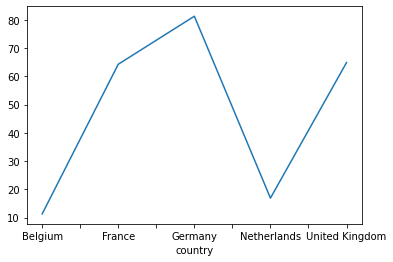

In [22]:
indexed['population'].plot()

<AxesSubplot:xlabel='country'>

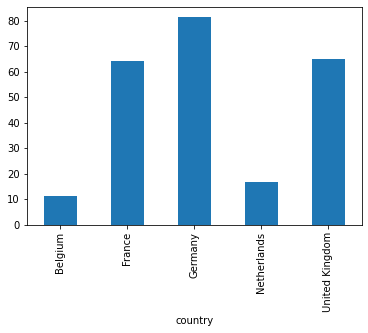

In [23]:
indexed['population'].plot(kind='bar')

<AxesSubplot:xlabel='area', ylabel='population'>

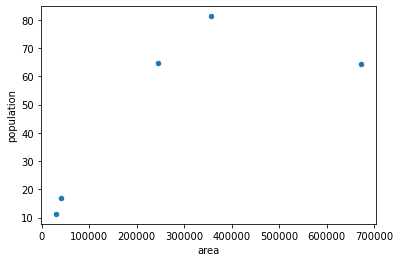

In [24]:
indexed.plot(kind='scatter', x='area', y='population')

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate and plot the population density in each country as a bar plot
</div>

# Working with multiple data sources

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created like a NumPy array:

In [25]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Creating Series from dictionary

It's possible to construct a series directly from a Python dictionary. Let's first define the dictionary of GDP in 2007:

In [45]:
gdp_dict = {
 'France': 30470,
 'Germany': 32170,
 'United Kingdom': 33203,
 'Belgium': 33692,
 'Netherlands': 36797,
 'Albania': 5937}

In [47]:
pd.Series(gdp_dict)

France            30470
Germany           32170
United Kingdom    33203
Belgium           33692
Netherlands       36797
Albania            5937
dtype: int64

Now we construct a `Series` object from the dictionary.

In [27]:
gdp = pd.Series(gdp_dict)
gdp

France            30470
Germany           32170
United Kingdom    33203
Belgium           33692
Netherlands       36797
Albania            5937
dtype: int64

### Automatic alignment

In [28]:
indexed['population'] * gdp

Albania                 NaN
Belgium            380719.6
France            1959221.0
Germany           2615421.0
Netherlands        621869.3
United Kingdom    2154874.7
dtype: float64

## Adding column to a dataset

Most novel information is hidden in **relations** between several data sets. Hardly, ever you will find all relevant information in a single table.

You can add a column to a dataframe, which will be also automatically aligned

In [29]:
indexed["gdp"] = gdp

In [30]:
indexed

,population,area,capital,gdp
country,,,,
Belgium,11.3,30510,Brussels,33692
France,64.3,671308,Paris,30470
Germany,81.3,357050,Berlin,32170
Netherlands,16.9,41526,Amsterdam,36797
United Kingdom,64.9,244820,London,33203


**Note** Albania is missing from the list, because it was not included in our DataFrame with countries

this changed the dataframe **in place**, but you can also create a new dataframe with:

## Combining two datasets 

### Creating dataframes in Python

In [31]:
cities = pd.DataFrame({
    "city": ["Paris", "London"], "inhabitants": [11.2, 14], "city_area":[1, 1]}).set_index("city")
cities

,inhabitants,city_area
city,,
Paris,11.2,1
London,14.0,1


### Joining two dataframes

alternatively you can join two dataframes by any column

In [32]:
indexed.join(cities, on='capital')

,population,area,capital,gdp,inhabitants,city_area
country,,,,,,
Belgium,11.3,30510,Brussels,33692,NaN,NaN
France,64.3,671308,Paris,30470,11.2,1.0
Germany,81.3,357050,Berlin,32170,NaN,NaN
Netherlands,16.9,41526,Amsterdam,36797,NaN,NaN
United Kingdom,64.9,244820,London,33203,14.0,1.0


<div class="alert alert-success">
    <b>Exercise</b> Imagine that you obtained this data from analysis of your experimental samples:


```python
samples = pd.DataFrame(
    {"Sample_id": ["A", "B", "C"], 
     "Xray_density": [10, 9.2, 11.2],
     "Weight": [11.0, 5.1, 5.2],
     "Species": ["Hydrosaurus", "Diplodocus", "Pterodactyl"]})
```

Your collaborators sent you a table with anatomical data of the knows species:

```python
species = pd.DataFrame({
    "Species": ["Diplodocus", "Pterodactyl", "Stegosaurus"],
    "Length (m)": [24, 10, 9],
    "Mass (kg)": [14800, 250, 5300],
})
```

Combine these data into a single dataframe 

Hint: you might have to change the index of one of the dataframes.
</div>

In [33]:
# samples.join(species.set_index('Species'), on='Species')

# Bonus: Data scraping and Groupby

In [34]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits")[0]

In [35]:
df = pd.read_html("data/capitals.html")[0]

Groupby allows to group rows by a common value of a column and apply an aggregating function (mean, sum, etc) to all the rows having the same grouping column value (similar to GROUP BY known from SQL) It's best to try it in practice

In [36]:
df.groupby('Country').sum().sort_values("Officialpopulation", ascending=False)

,Unnamed: 0,Officialpopulation,2011 Eurostatpopulation[1],Image
Country,,,,
Russia,234,27047440,0.0,0.0
Turkey,32,16574679,0.0,0.0
United Kingdom,28,10349366,9246986.0,0.0
Germany,65,8204480,7632468.0,0.0
...,...,...,...,...
Serbia,20,1397939,0.0,0.0
Czech Republic,21,1324277,1241664.0,0.0
Bulgaria,24,1238438,1324025.0,0.0
Belgium,26,1211035,1136778.0,0.0


## Reshape

Hadley Wickham, Tidy Data, https://vita.had.co.nz/papers/tidy-data.pdf, Journal of Statistical Software

**Quiz** Which of the two data frames is in *wide* format, which one is in *long" format

Table 1:

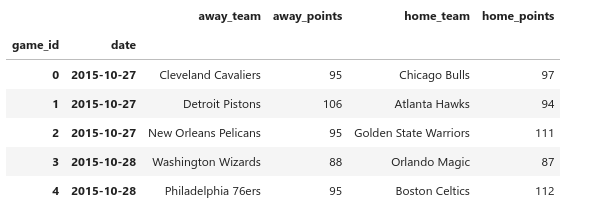


Table 2:

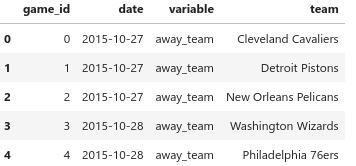


Example by Tom Augspurger, downloaded from: https://tomaugspurger.github.io/modern-5-tidy

In [37]:
tables = pd.read_html("http://www.basketball-reference.com/leagues/NBA_2016_games.html")

Common fuctions used to convert the shape of the dataframe:

* `pivot`
* hierachical index
* `stack/unstack`
* `melt`

GDP data set is wide:

In [38]:
data = pd.read_csv("data/gapminder_gdp_europe.csv")
data

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
1,Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
2,Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
3,Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Sweden,8527.844662,9911.878226,12329.441920,15258.296970,17832.024640,18855.725210,20667.381250,23586.929270,23880.016830,25266.594990,29341.630930,33859.748350
27,Switzerland,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,30281.704590,31871.530300,32135.323010,34480.957710,37506.419070
28,Turkey,1969.100980,2218.754257,2322.869908,2826.356387,3450.696380,4269.122326,4241.356344,5089.043686,5678.348271,6601.429915,6508.085718,8458.276384
29,United Kingdom,9979.508487,11283.177950,12477.177070,14142.850890,15895.116410,17428.748460,18232.424520,21664.787670,22705.092540,26074.531360,29478.999190,33203.261280


Convert to tidy (long) format:

In [39]:
tidy_gdp = data.melt(id_vars=['country'])
tidy_gdp['year'] = tidy_gdp.variable.str.slice(10).astype(int)
tidy_gdp = tidy_gdp.drop("variable", axis=1)[['country', 'year', 'value']]
tidy_gdp

,country,year,value
0,Albania,1952,1601.056136
1,Austria,1952,6137.076492
2,Belgium,1952,8343.105127
3,Bosnia and Herzegovina,1952,973.533195
...,...,...,...
356,Sweden,2007,33859.748350
357,Switzerland,2007,37506.419070
358,Turkey,2007,8458.276384
359,United Kingdom,2007,33203.261280


In [40]:
wide_gdp = tidy_gdp.pivot(index='country', columns='year', values='value')
wide_gdp

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
...,...,...,...,...,...,...,...,...,...,...,...,...
Sweden,8527.844662,9911.878226,12329.441920,15258.296970,17832.024640,18855.725210,20667.381250,23586.929270,23880.016830,25266.594990,29341.630930,33859.748350
Switzerland,14734.232750,17909.489730,20431.092700,22966.144320,27195.113040,26982.290520,28397.715120,30281.704590,31871.530300,32135.323010,34480.957710,37506.419070
Turkey,1969.100980,2218.754257,2322.869908,2826.356387,3450.696380,4269.122326,4241.356344,5089.043686,5678.348271,6601.429915,6508.085718,8458.276384
United Kingdom,9979.508487,11283.177950,12477.177070,14142.850890,15895.116410,17428.748460,18232.424520,21664.787670,22705.092540,26074.531360,29478.999190,33203.261280


Countries as columns

In [41]:
wide_gdp_years = tidy_gdp.pivot(index='year', columns='country', values='value')
wide_gdp_years

country,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,Finland,France,...,Portugal,Romania,Serbia,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom
year,,,,,,,,,,,,,,,,,,,,,
1952,1601.056136,6137.076492,8343.105127,973.533195,2444.286648,3119.236520,6876.140250,9692.385245,6424.519071,7029.809327,...,3068.319867,3144.613186,3581.459448,5074.659104,4215.041741,3834.034742,8527.844662,14734.23275,1969.100980,9979.508487
1957,1942.284244,8842.598030,9714.960623,1353.989176,3008.670727,4338.231617,8256.343918,11099.659350,7545.415386,8662.834898,...,3774.571743,3943.370225,4981.090891,6093.262980,5862.276629,4564.802410,9911.878226,17909.48973,2218.754257,11283.177950
1962,2312.888958,10750.721110,10991.206760,1709.683679,4254.337839,5477.890018,10136.867130,13583.313510,9371.842561,10560.485530,...,4727.954889,4734.997586,6289.629157,7481.107598,7402.303395,5693.843879,12329.441920,20431.09270,2322.869908,12477.177070
1967,2760.196931,12834.602400,13149.041190,2172.352423,5577.002800,6960.297861,11399.444890,15937.211230,10921.636260,12999.917660,...,6361.517993,6470.866545,7991.707066,8412.902397,9405.489397,7993.512294,15258.296970,22966.14432,2826.356387,14142.850890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2497.437901,27042.018680,25575.570690,2546.781445,6302.623438,8447.794873,14297.021220,26406.739850,20647.164990,24703.796150,...,16207.266630,6598.409903,9325.068238,9498.467723,14214.716810,18603.064520,23880.016830,31871.53030,5678.348271,22705.092540
1997,3193.054604,29095.920660,27561.196630,4766.355904,5970.388760,9875.604515,16048.514240,29804.345670,23723.950200,25889.784870,...,17641.031560,7346.547557,7914.320304,12126.230650,17161.107350,20445.298960,25266.594990,32135.32301,6601.429915,26074.531360
2002,4604.211737,32417.607690,30485.883750,6018.975239,7696.777725,11628.388950,17596.210220,32166.500060,28204.590570,28926.032340,...,19970.907870,7885.360081,7236.075251,13638.778370,20660.019360,24835.471660,29341.630930,34480.95771,6508.085718,29478.999190
2007,5937.029526,36126.492700,33692.605080,7446.298803,10680.792820,14619.222720,22833.308510,35278.418740,33207.084400,30470.016700,...,20509.647770,10808.475610,9786.534714,18678.314350,25768.257590,28821.063700,33859.748350,37506.41907,8458.276384,33203.261280


<AxesSubplot:xlabel='year'>

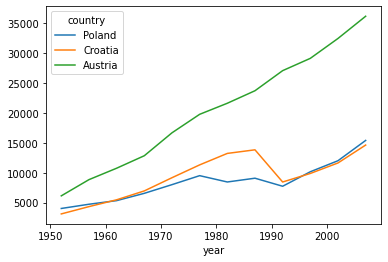

In [42]:
wide_gdp_years[["Poland", "Croatia", "Austria"]].plot()

# Conclusions

**Exercise** Given coronavirus cases data (source: WHO, https://covid19.who.int/table):

1. Convert to wide format, where column 1 is country, column 2 is Region, column 3 is the total number of cases
2. Calculate total of number of cases per region.

In [43]:
pd.read_csv("data/WHO COVID-19 global table data January 22nd 2021 at 9.16.23 PM.csv")

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,96267473,12332.006396,4379850,624353,2082745,266.802731,94415,16079,NaN
1,United States of America,Americas,24225155,73187.190000,1353825,187919,402803,1216.920000,21281,4368,Community transmission
2,India,South-East Asia,10625428,7699.560000,97745,14545,153032,110.890000,1114,163,Clusters of cases
3,Brazil,Americas,8638249,40639.220000,381713,64385,212831,1001.280000,6867,1340,Community transmission
...,...,...,...,...,...,...,...,...,...,...,...
234,Tokelau,Western Pacific,0,0.000000,0,0,0,0.000000,0,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0,0,0.000000,0,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0,0,0.000000,0,0,No cases
237,Tuvalu,Western Pacific,0,0.000000,0,0,0,0.000000,0,0,No cases


go to [Matplotlib](introduction_to_matplolib.ipynb)